# Ensemble Methods in Machine Learning

Ensemble methods are a foundational concept in machine learning, where the principle is straightforward yet powerful: combine the predictions from multiple models to create a final model that is more robust and accurate than any individual component model. This approach is akin to seeking advice from a group of experts rather than relying on a single person's opinion. Ensemble methods can reduce variance, bias, or improve predictions, and are broadly divided into several types:

## Bootstrap Aggregating (Bagging)

Bootstrap aggregating, often referred to as bagging, is a method that involves creating multiple versions of a predictor and using these to get an aggregated predictor. The data used for training each model is resampled with replacement from the entire training dataset. This means that each model sees a slightly different slice of the data, leading to variance among their predictions. However, when combined, these models tend to cancel out their individual variances, leading to a more stable and robust prediction.

## Random Forests

Random Forests take the concept of bagging a step further by introducing randomness into the tree building process. Here's how it works:

1. Start with a bootstrap sample of the data.
2. Fit a decision tree to this sample. When splitting a node during the construction of the tree, a random subset of the features is considered for the split.
3. Each tree in the forest is built from a sample drawn with replacement (bootstrap sample) from the training set.
4. After a large number of trees are built using this method, the predictions of the individual trees are averaged to make the final prediction.

The randomization ensures that the high variance of the trees is averaged out, yielding a model with better generalization performance.

## Boosting

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At each iteration of the training process, a new learner is added, while all existing learners are kept unchanged. All learners are weighted based on their performance (e.g., accuracy), and after a weak learner is added, the data weights are readjusted. Misclassified input data gains a higher weight, and examples that are classified correctly lose weight. Thus, future weak learners focus more on the examples that previous weak learners misclassified.

### AdaBoost

AdaBoost, short for Adaptive Boosting, starts by fitting an initial model (usually a decision tree) to the data. Then it increases the weights of the misclassified cases so that subsequent models focus more on difficult cases. This process is repeated sequentially, each time updating the weights of instances based on the last prediction. AdaBoost is sensitive to noisy data and outliers and can be less robust in such situations.

### Gradient Boosting

Gradient Boosting is a sophisticated version of boosting. It builds the model in a stage-wise fashion like AdaBoost but generalizes the procedure by allowing optimization of an arbitrary differentiable loss function. In Gradient Boosting, trees are built sequentially, with each tree being trained to correct the mistakes of the previous one. Unlike AdaBoost, which changes the weights for misclassified data points at every iteration, Gradient Boosting performs this by fitting the new model to the residual errors made by the previous predictor.

Let's fit these Ensemble Learning models and see how well they fit and can make predictions on our data.

In [23]:
!pip install imbalanced-learn


#Random Forest
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv("salary.csv")

# Convert all columns to float, handling errors
df = df.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Replace infinite values with the maximum non-infinite value from each column
for column in df.columns:
    if np.isinf(df[column]).any():
        max_value = df[df[column] != np.inf][column].max()
        df[column].replace([np.inf, -np.inf], max_value, inplace=True)


In [22]:
#Regression random forest

# Assuming 'df' is your DataFrame and it's already loaded with data
features = ["Age", "GP", "MP", "FG", "FG%", "3P", "3P%", "eFG%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS",
            "Total Minutes", "PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%",
            "OWS", "DWS", "WS", "WS/48", "OBPM", "DBPM", "BPM", "VORP"]
X = df[features].values
y = df["Salary"].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
forest_regressor.fit(X_train, y_train)

# Make predictions
y_pred = forest_regressor.predict(X_test)

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 33360094460699.086
Root Mean Squared Error: 5775819.8085379265


As we can see, our RMSE is quite low and suggests that under a random forest model, we can predict one's salary within an average of $5 million.

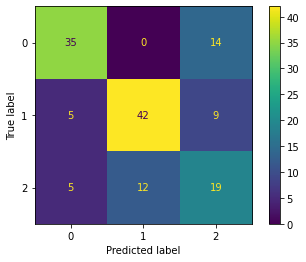

              precision    recall  f1-score   support

       Cheap       0.78      0.71      0.74        49
   Expensive       0.78      0.75      0.76        56
      Medium       0.45      0.53      0.49        36

    accuracy                           0.68       141
   macro avg       0.67      0.66      0.67       141
weighted avg       0.69      0.68      0.69       141



In [16]:
#Classification random forest

# Assuming 'df' is your DataFrame and it's already loaded with data
features = ["Age", "GP", "MP", "FG", "FG%", "3P", "3P%", "eFG%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS",
            "Total Minutes", "PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%",
            "OWS", "DWS", "WS", "WS/48", "OBPM", "DBPM", "BPM", "VORP"]
X = df[features].values
df['Salary_Category'] = pd.qcut(df['Salary'], q=3, labels=["Cheap", "Medium", "Expensive"])
y = df["Salary_Category"].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Handle class imbalance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10)
rf.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = rf.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

As we can see, random forest works well for classification as well and we correctly can classify a player's salary into high, medium, and low with an average accuracy of around 70%.

Let's now fit a boost model and fit both AdaBoost and Gradient Boost models:

In [20]:
#Ada boost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier with a decision stump
ada_boost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)

# Train the AdaBoost model
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_boost.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Model Accuracy: {ada_accuracy}")


AdaBoost Model Accuracy: 0.6453900709219859


In [21]:
#Gradient boost

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gradient_boost = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gradient_boost.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boost.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy}")


Gradient Boosting Model Accuracy: 0.7163120567375887


As we can see, our Gradient Boost model fits our data and can make predictions more accurately than our AdaBoost model. As we've seen earlier, our data and the relationship that our predictors have with salary is quite complex, which is probably why our AdaBoost model is less accurate than our Gradient Boost model since AdaBoost is sensitive to noisy data and can be less robust in such situations.